# Assignment 4
## Bad Apple challenge Evaluation and Analysis Continued

This assignment analyses the image based navigation performance mainly based on the measurement NDCG@3, inspection of some independent variables and their correlation with the achieved performance and at last but not least tries to compare the three rounds effects on the feedback performance. The three tasks implement in this assignments are:

<p>Task1</p>
<ul>
<li>A) Before doing and computations and analysis the raw data was cleaned and made ready for analysis </li>
<li>B) NDCG@3 was calculated for each challenge </li>
<li>C) Overall and for each interface(rounds) NDCG@3 Average was computed</li>
</ul>

<p>Task2</p>
<ul>
<li>A) For this task first MAP precision was evaluated for each challenge</li>
<li>B) Then the independent variables like the users,interface rounds, target images,target diseases and their effect on the achieved performance was analysed. Here MAP measurement was used as a performance measure. </li>
<li>C) Correlations and plots of this analysis is then described bellow cells in which they are implemented</li>
</ul> 
<p>Task3</p>
<ul>
<li>A) Comparison of the different interface based on feedback was thoroughly studied.</li>
<li>B)  Here for comparison the formula used was:
            fb_performance=positive_prediction precision + negative_prediction_precision - 1</li>
</ul> 

###At the bottom some analysis regarding the diseases is performed. It is implemented by counting how many times a diseases was successfully selected when it was the target disease and which diseases and their counts were wrongly selected instead.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

df =  pd.read_csv('ChallengeData_10-31.csv',delimiter=';')
###
###data cleaning
###
df.final_rank=df.final_rank.apply(lambda x: eval(x))
df.positive_feed=df.positive_feed.apply(lambda x: eval(x))
df.true_positive=df.true_positive.apply(lambda x: eval(x))
df.negative_feed=df.negative_feed.apply(lambda x: eval(x))
df.true_negative=df.true_negative.apply(lambda x: eval(x))
df.positive_feed[4]=list(set(df.positive_feed[4]))
df.negative_feed[4]=list(set(df.negative_feed[4]))
df.positive_feed[14]=list(set(df.positive_feed[14]))
df.negative_feed[14]=list(set(df.negative_feed[14]))
##here I deleted the last image as the shown images 
del(df.negative_feed[14][-2:-1])
df.positive_feed[28]=list(set(df.positive_feed[28]))
df.negative_feed[28]=list(set(df.negative_feed[28]))
del(df.negative_feed[28][3:5])
df.true_negative[4]=list(set(df.true_negative[4]))
df.true_positive[4]=list(set(df.true_positive[4]))
df.true_negative[14]=list(set(df.true_negative[14]))
df.true_positive[14]=list(set(df.true_positive[14]))
df.true_negative[28]=list(set(df.true_negative[28]))
df.true_positive[28]=list(set(df.true_positive[28]))

round4 = df.round_images == 4
round8 = df.round_images == 8
round12 = df.round_images == 12

for i in range(0,len(df.final_rank)):
    if df.selected_disease[i]==df.target_disease[i] and df.success[i]== False:
        print("Annomality type1.0 Row",i,"selected=",df.selected_disease[i],"target=",
              df.target_disease[i],"success=",df.success[i])
    if df.selected_disease[i]!=df.target_disease[i] and df.success[i]== True:
        print("Annomality type1.1 Row",i,"selected=",df.selected_disease[i],"target=",
              df.target_disease[i],"succes=",df.success[i])
    if df.final_rank[i][0][1] <= 0 and df.success[i]==True:
        print("Annomality type2 Row",i,"No disease was retrieved but success=",df.success[i])
df.success[5]=False
df.success[28]=False
df.success[74]=False
df.success[76]=True
df.success[77]=False
df.success[78]=True

Annomality type1.1 Row 5 selected= Alternaria target= Penicillium succes= True
Annomality type2 Row 28 No disease was retrieved but success= True
Annomality type1.1 Row 74 selected= Botrytis target= Penicillium succes= True
Annomality type1.0 Row 76 selected= Alternaria target= Alternaria success= False
Annomality type1.1 Row 77 selected= Botrytis target= Penicillium succes= True
Annomality type1.0 Row 78 selected= Botrytis target= Botrytis success= False


### Data Cleaning
1. The number of images shown was 24 for all challenges except the ones with index 4,14 and 28 in which it exceeded 24. This is because some image ids were rewritten there fore appeared as duplicates. These duplicates were removed from the shown images and positive and negative feeds.
2. Then Success anomalities printed above were corrected

In [2]:
df['ndcg_3']=0.0
df['MAP']=0.0
for i in range(0,len(df.final_rank)): 
    p = 0
    for t in df.final_rank[i]:
        if t[0]==df.target_disease[i] and t[1]>0:
            if p<2:
                df.ndcg_3[i]= 1
                break
            else:
                df.ndcg_3[i]=1/np.log2(p+1)
                break
        elif t[1] > 0 and p < 2:
            p+=1
        else:
            break
for i in range(0,len(df.final_rank)): 
    tp=0.0
    n=0
    for t in df.final_rank[i]:
        if t[0]==df.target_disease[i] and t[1]>0:
            tp=1.0
            n+=1
            df.MAP[i]=tp/n
            break
        elif t[1]<0:
            break
        else:
            n+=1
r4_mean=np.mean(df.ndcg_3[round4])
r8_mean=np.mean(df.ndcg_3[round8])
r12_mean=np.mean(df.ndcg_3[round12])
avg_ndcg3=np.mean(df.ndcg_3)
rounds = ['round4','round8','round12']

## Task 1
1. From the Ndcg@3  results printed and the plot below it is clear that round12 interface had the highest score of around 0.675 while the other two interface rounds had a similar score of  0.521 for round4 and 0.518 for round8. 
2. The algorithm used here is the one in the notes where NDCG@3 = DCG@3/IDCG@3. Since the relevant diseases returned is equal to one the IDCG@3 for this system would be to return it in the first position, there for IDCG@3 of the system is 1. The DCG@3 is 1 if the target disease is in the retrieved diseases and is ranked first then DCG = 1. But it is also 1 if the target disease is positioned at the second place which makes ndcg a bad measure of performance in this system.
3. I used and compared the results of a different ndcg formula with the usual one which seems to be more meaningfull. DCG@3 = 1/log of p+1 base 2 where p is the position of the relevant disease. This results in dcg for pos1=1 pos2=1/log3 base 2 and for pos3=1/log4 base 2 and so on.
4. The values and plots for the task are printed below the cell below.

ndcg@3_OVERALL =  0.5775997348324536
ndcg@3_Round4 =  0.5217391304347826
ndcg@3_Round8 =  0.5187042505102083
ndcg@3_Round12 =  0.6753953169047638
my_ndcg@3_OVERALL =  0.5086677382275179
my_ndcg@3_Round4 =  0.5056925979813677
my_ndcg@3_Round8 =  0.43409459885204604
my_ndcg@3_Round12 =  0.5805502758333402


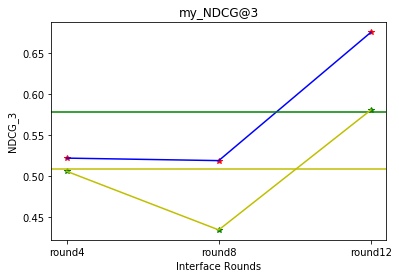

In [3]:
df['my_ndcg3']=0.0
for i in range(0,len(df.final_rank)): 
    p = 0
    for t in df.final_rank[i]:
        if t[0]==df.target_disease[i] and t[1]>0:
            p+=1
            df.my_ndcg3[i]=1/np.log2(p+1)
        elif t[1] > 0 and p < 2:
            p+=1
        else:
            break
r4_my=np.mean(df.my_ndcg3[round4])
r8_my=np.mean(df.my_ndcg3[round8])
r12_my=np.mean(df.my_ndcg3[round12])
avg_my=np.mean(df.my_ndcg3)
rounds = ['round4','round8','round12']
print("ndcg@3_OVERALL = ",avg_ndcg3)
print("ndcg@3_Round4 = ",r4_mean)
print("ndcg@3_Round8 = ",r8_mean)
print("ndcg@3_Round12 = ",r12_mean)
print("my_ndcg@3_OVERALL = ",avg_my)
print("my_ndcg@3_Round4 = ",r4_my)
print("my_ndcg@3_Round8 = ",r8_my)
print("my_ndcg@3_Round12 = ",r12_my)
plt.title('my_NDCG@3')
plt.xlabel('Interface Rounds')
plt.ylabel('NDCG_3')
plt.plot(rounds,[r4_mean,r8_mean,r12_mean],'*r')
plt.plot(rounds,[r4_mean,r8_mean,r12_mean],'-b')
plt.axhline(y=avg_ndcg3, color='g', linestyle='-')
plt.plot(rounds,[r4_my,r8_my,r12_my],'*g')
plt.plot(rounds,[r4_my,r8_my,r12_my],'-y')
plt.axhline(y=avg_my, color='y', linestyle='-')
plt.show()

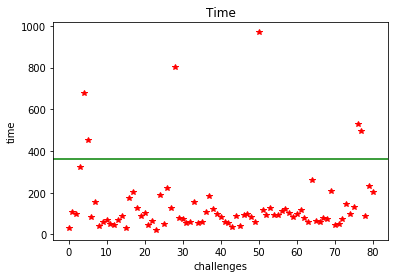

In [4]:
plt.title('Time')
plt.xlabel('challenges')
plt.ylabel('time')
plt.plot(df.time,'*r')
plt.axhline(y=361, color='g', linestyle='-')
plt.show()

### Time elapsed regulation
In the above plot we see that the time elapsed for each session is mostly less 200 seconds which is fair enough. But there are also few sessions in which users spent more than 800 seconds(might be due to some network failures or latency) which is not considered reasonable. In this case, 360 seconds is assumed to be a value of maximum thereshold that is reasonable. So as the sample data of the file is few the rows with time greater than 360 were not removed r

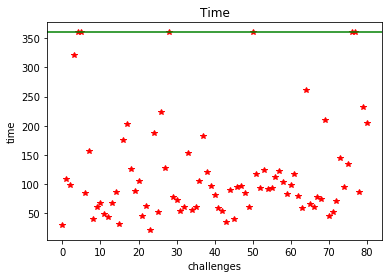

In [5]:
for i in range(len(df.time)):
    if df.time[i]>360:
        df.time[i]=360
        
plt.title('Time')
plt.xlabel('challenges')
plt.ylabel('time')
plt.plot(df.time,'*r')
plt.axhline(y=361, color='g', linestyle='-')
plt.show()

In [6]:
users=list(set(df.user_id))
targetIM = list(set(df.target_image))
targetD = list(set(df.target_disease))
rounds = list(set(df.round_images))
us_tarIM = users + targetIM + targetD + rounds
counts = dict((k,0.0) for k in us_tarIM)
uMap =dict((k,0.0) for k in us_tarIM)
pfeed=dict((k,0.0) for k in us_tarIM)
nfeed=dict((k,0.0) for k in us_tarIM)
t_elapsed=dict((k,0.0) for k in us_tarIM)
tpositive=dict((k,0.0) for k in us_tarIM)
tnegative=dict((k,0.0) for k in us_tarIM)
success_counts=dict((k,0.0) for k in us_tarIM)

for i in range(len(df.final_rank)):
    counts[df.user_id[i]]+=1
    uMap[df.user_id[i]]+=df.MAP[i]
    pfeed[df.user_id[i]]+=len(df.positive_feed[i])
    nfeed[df.user_id[i]]+=len(df.negative_feed[i])
    t_elapsed[df.user_id[i]]+= df.time[i]
    tpositive[df.user_id[i]]+=len(df.true_positive[i])
    tnegative[df.user_id[i]]+=len(df.true_negative[i])
    if df.selected_disease[i]== df.target_disease[i]:
        success_counts[df.user_id[i]]+= 1    
    counts[df.target_image[i]]+=1
    uMap[df.target_image[i]]+=df.MAP[i]
    pfeed[df.target_image[i]]+=len(df.positive_feed[i])
    nfeed[df.target_image[i]]+=len(df.negative_feed[i])
    t_elapsed[df.target_image[i]]+= df.time[i]
    tpositive[df.target_image[i]]+=len(df.true_positive[i])
    tnegative[df.target_image[i]]+=len(df.true_negative[i])
    if df.selected_disease[i]== df.target_disease[i]:
        success_counts[df.target_image[i]]+= 1
    
    counts[df.target_disease[i]]+=1
    uMap[df.target_disease[i]]+=df.MAP[i]
    pfeed[df.target_disease[i]]+=len(df.positive_feed[i])
    nfeed[df.target_disease[i]]+=len(df.negative_feed[i])
    t_elapsed[df.target_disease[i]]+= df.time[i]
    tpositive[df.target_disease[i]]+=len(df.true_positive[i])
    tnegative[df.target_disease[i]]+=len(df.true_negative[i])
    if df.selected_disease[i]== df.target_disease[i]:
        success_counts[df.target_disease[i]]+= 1
    
    counts[df.round_images[i]]+=1
    uMap[df.round_images[i]]+=df.MAP[i]
    pfeed[df.round_images[i]]+=len(df.positive_feed[i])
    nfeed[df.round_images[i]]+=len(df.negative_feed[i])
    t_elapsed[df.round_images[i]]+= df.time[i]
    tpositive[df.round_images[i]]+=len(df.true_positive[i])
    tnegative[df.round_images[i]]+=len(df.true_negative[i])
    if df.selected_disease[i]== df.target_disease[i]:
        success_counts[df.round_images[i]]+= 1

## Task2:
1. Here additional independent variables were taken in to consideration for correlation inspection. Users, target images,target diseases and interface rounds were aggregated together for the analysis.
2. This was done as follows
<p>Task2</p>
<ul>
    <li>session counts,postive feed, negative feed,true positives feed,true negative feed, time, MAP and success precision for each independent variable mentions above was computed</li>
    <li>Then scatter matrix plot was plotted to inspect the relations among these computed values</li>
    <li>Then scatter matrix plot was plotted to inspect the relations among these computed values</li>
    <li>After that correlation coefficients matrix was printed </li>
    <li> Then after linear regression formula of the form y = w0 + w*x1 + w*x2 was estimated. where w1 and w2 are coefficients and w0 is the intercept. X1 and X2 where chosen based on the scatter plot initial inspection and the matrix of the correlation coefficients. </li>
    <li>At last the root mean square error was computed  </li>
</ul> 
        - 

In [7]:
uid=pd.DataFrame()
uid['uid_timage']=us_tarIM
uid['counts']=counts.values()
uid['positive_feed']=pfeed.values()
uid['negative_feed']=nfeed.values()
uid['tpositive']=tpositive.values()
uid['tnegative']=tnegative.values()
uid['time']=t_elapsed.values()
uid['MAP']=uMap.values()
uid['success_p']=success_counts.values()
for i in range(len(uid.uid_timage)):
    uid.positive_feed[i]=uid.positive_feed[i]/(uid.counts[i])
    uid.negative_feed[i]=uid.negative_feed[i]/(uid.counts[i])
    uid.tpositive[i]=uid.tpositive[i]/uid.counts[i]
    uid.tnegative[i]=uid.tnegative[i]/uid.counts[i]
    uid.MAP[i]=uid.MAP[i]/uid.counts[i]
    uid.time[i]=uid.time[i]/uid.counts[i]
    uid.success_p[i]=uid.success_p[i]/uid.counts[i]

In [8]:
colns = ['counts','positive_feed','negative_feed','tpositive','tnegative','MAP','time','success_p']
data = uid[colns].values.T
cm = np.corrcoef(data)
cm = np.around(cm,decimals=2)
print('Cross correlation Coefficents')
print(cm)

Cross correlation Coefficents
[[ 1.   -0.15 -0.19 -0.06 -0.18  0.07 -0.07  0.07]
 [-0.15  1.   -0.03  0.77 -0.03  0.29 -0.2  -0.19]
 [-0.19 -0.03  1.    0.13  0.99 -0.17  0.18  0.17]
 [-0.06  0.77  0.13  1.    0.21  0.72 -0.07  0.35]
 [-0.18 -0.03  0.99  0.21  1.   -0.08  0.19  0.27]
 [ 0.07  0.29 -0.17  0.72 -0.08  1.   -0.09  0.7 ]
 [-0.07 -0.2   0.18 -0.07  0.19 -0.09  1.    0.01]
 [ 0.07 -0.19  0.17  0.35  0.27  0.7   0.01  1.  ]]


### Cross correlation Coefficents
From the matrix above considering MAP as a target performance measure(row 5 (6th row)) 0.72 for true positve feedback precision and 0.7 for success percentage are the only two variables worth considering here for further analysis. This is Clearer on the scatter matrix plot below. we see a linear relationship in cell(5,3) and cell(5,7).

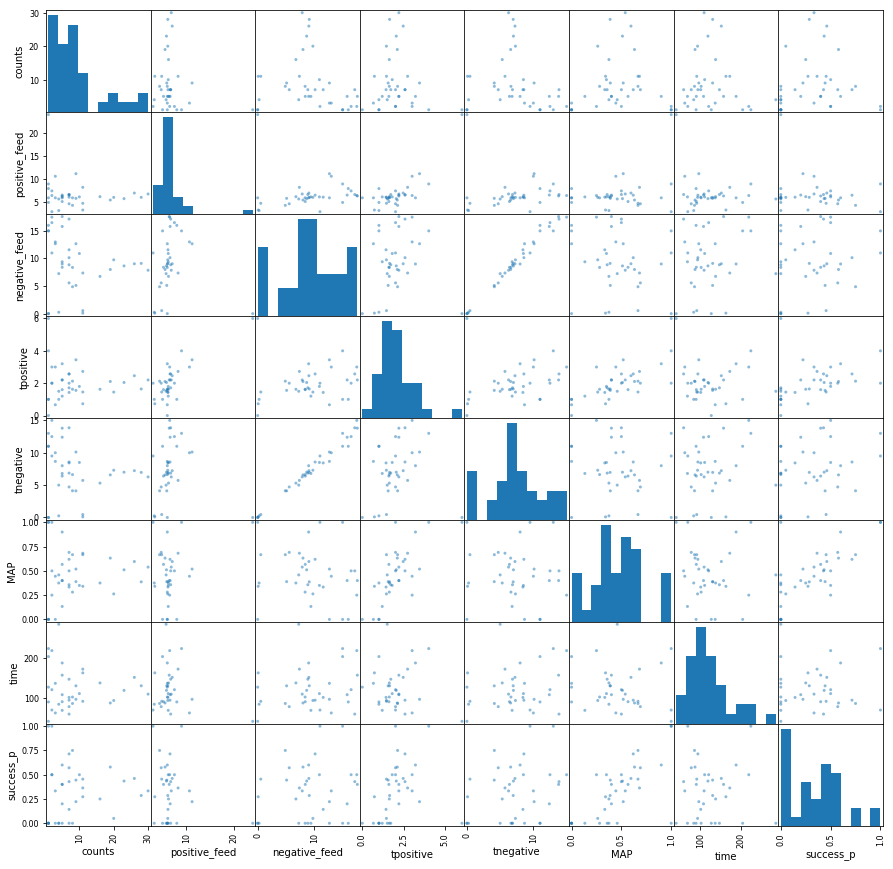

In [9]:
pd.plotting.scatter_matrix(uid.loc[:,colns],figsize=(15,15))
plt.show()

Thoughthey are not target variables it is worth mentioning that there is almost perfect correlation between the  negative feeds and true negative feeds cell(2,4) with a correlation value of 0.99. This means the more negative feedback is given by a user the higher the true negative percision. Also the positive feedback is positively correlated to the true positive feed cell(1,3) with 0.77 correlation.

In [10]:
X = uid[['tpositive','success_p']].values
y = uid['MAP'].values
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis])
lasso = linear_model.LassoCV(cv=6)
lasso.fit(x_std, y_std)
# The estimator chose automatically its lambda:
m=lasso.coef_
b=lasso.intercept_
reg_line = [m[0]*x1+m[1]*x2 +b for x1,x2 in x_std]
print("intercept=",b,"\t coefficients W=",m)

intercept= 3.3109038437794063e-16 	 coefficients W= [0.5374595  0.50708201]


###  Linear Regression 
Here first the variables where standardized and then a linear model was estimated. the final equation derived was y = w1*x2+w2*x2 . Y intercept can be considered 0. The 3D plot bellow is the scatter plot of the estimated regression line.

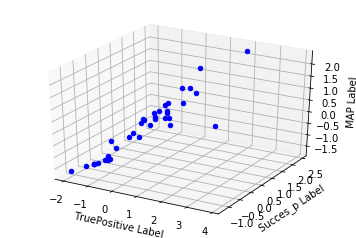

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx=[]
yy=[]
zz=[]
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i in range(37):
    xs = x_std[i][0]
    ys = x_std[i][1]
    zs = reg_line[i]
    xx.append(xs)
    yy.append(ys)
    zz.append(zs)
    ax.scatter(xs, ys, zs, c='b', marker='o')
    
    
#Axes3D.plot_surface(xx, yy, zz)
ax.set_xlabel('TruePositive Label')
ax.set_ylabel('Succes_p Label')
ax.set_zlabel('MAP Label')
plt.show()

In [12]:
rms = np.sqrt(mean_squared_error(y_std, reg_line))
print("Root Mean Square Error of the regression model above is\n",rms)

Root Mean Square Error of the regression model above is
 0.5113360468030966


In [13]:
r4 = uid.uid_timage==4
r8 = uid.uid_timage==8
r12 = uid.uid_timage==12
round4_fb_performance = uid.tpositive[r4]/uid.positive_feed[r4]+uid.tnegative[r4]/uid.negative_feed[r4] + uid.MAP[r4]+uid.success_p[r4]
round8_fb_performance = uid.tpositive[r8]/uid.positive_feed[r8]+uid.tnegative[r8]/uid.negative_feed[r8] +uid.MAP[r8]+uid.success_p[r8]
round12_fb_performance = uid.tpositive[r12]/uid.positive_feed[r12]+uid.tnegative[r12]/uid.negative_feed[r12] +uid.MAP[r12]+uid.success_p[r12]

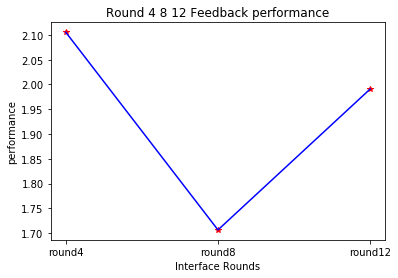

In [14]:
roundss = ['round4','round8','round12']
plt.title('Round 4 8 12 Feedback performance')
plt.xlabel('Interface Rounds')
plt.ylabel('performance')
plt.plot(roundss,[round4_fb_performance.values,round8_fb_performance.values,round12_fb_performance.values],'*r')
plt.plot(roundss,[round4_fb_performance.values,round8_fb_performance.values,round12_fb_performance.values],'-b')
#plt.axhline(y=avg_ndcg3, color='g', linestyle='-')
plt.show()

### Task3
1. The three rounds where compared over the general formal which adds the measures true positive precision,true negative precision, Map and success percentage.
2. From the plot above it is clear that round4 scored the highest mark of 2.11 and then followed by round12 of a score around 2 and the worst performant was round8. 

In [15]:
m1=m2=m3=m4=0
b1=b2=b3=b4=0
a1=a2=a3=a4=0
p1=p2=p3=p4=0

for i in range(len(df.final_rank)):
    if df.target_disease[i]=='Mucor':
        if df.selected_disease[i]=='Mucor':
            m1+=1
        elif df.selected_disease[i]=='Botrytis':
            m2+=1
        elif df.selected_disease[i]=='Alternaria':
            m3+=1
        else:
            m4+=1
    elif df.target_disease[i]=='Botrytis':
        if df.selected_disease[i]=='Mucor':
            b1+=1
        elif df.selected_disease[i]=='Botrytis':
            b2+=1
        elif df.selected_disease[i]=='Alternaria':
            b3+=1
        else:
            b4+=1
    elif df.target_disease[i]=='Alternaria':
        if df.selected_disease[i]=='Mucor':
            a1+=1
        elif df.selected_disease[i]=='Botrytis':
            a2+=1
        elif df.selected_disease[i]=='Alternaria':
            a3+=1
        else:
            a4+=1
    else:
        if df.selected_disease[i]=='Mucor':
            p1+=1
        elif df.selected_disease[i]=='Botrytis':
            p2+=1
        elif df.selected_disease[i]=='Alternaria':
            p3+=1
        else:
            p4+=1  

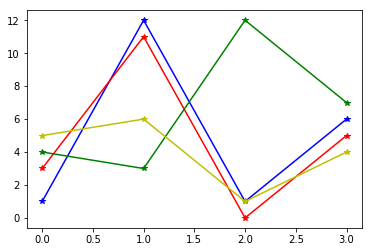

In [16]:
x = np.arange(4)
plt.plot(x,[m1,m2,m3,m4],'*b-')
plt.plot(x,[b1,b2,b3,b4],'*r-')
plt.plot(x,[a1,a2,a3,a4],'*g-')
plt.plot(x,[p1,p2,p3,p4],'*y-')
plt.show()

### Some Analysis on the Target Diseases
1. the total number of sessions in which Mucor was a target disease is 20 and out of 20 only once was selected as the target disease. in 12 instances the disease Botrytis was selected instead these means that the disease Mucor was hard to differentiate from Botrytis. In addition the disease Penicillium was selected 6 times instead of Mucor this made it even harder to select.
2. Botrytis was succefully selected in 11 instances out of 19. In 6 occassions the disease Penicillium was selected instead of Botrytis.
3. Alternaria was the target disease for 26 sessions and was successfully selected in 12 where as was wrongly selected Mucor 4 times Botrytis 3 and 7 users selected Penicillium instead.
4. Penicillium appeared 16 times as target diseases. 4 times successfully selected where as wrongly selected 5,6 and 1 time with Mucor,Botrytis and Alternaria respectively. 